<h1>Studienarbeit: Predictive Analytics</h1>
<b>Personen:</b> Luise Fabich / Vinh-Phnong Nguyen / Marc Willberg

<h2>Vorhersage des Trinkgelds der gelben Taxis in New York anhand von verschiedenen Faktoren:</h2>
Ziel ist es, ein Modell zu entwickeln, das die zu erwartenden Trinkgelder auf der Grundlage verschiedener Faktoren wie Fahrtdauer, Tageszeit und Zielort vorhersagt. Die Datenbasis bildet hierbei die Taxifahrten der gelben Taxis in New York aus dem Jahr 2023.

<h1>Benötigte Packete: </h1>

<h1>Laden Der Packete:</h1>

Hier befinden sich alle Packete die einbunden werden müssen.

In [179]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
from IPython.display import display
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta, date
import calendar
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


<h1>Laden der Datensätze:</h1>
<p>Die zu analysierenden Daten sind unter der folgenden Webseite zu finden:</p>
<p>Page: <a href="https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">TLC Trip Record Data</a></p>

In [13]:
year = 2023
path = f'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY'
year_directory = os.path.join(path, f'{year}')

print("Folgende Daten wurden gefunden:")
parquet_files = [os.path.join(year_directory, file) for file in os.listdir(year_directory) if file.endswith('.parquet')]
for file in parquet_files:
    print(file)

Folgende Daten wurden gefunden:
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-01.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-02.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-03.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-04.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-05.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-06.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-07.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-08.parquet
C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_T


<h2>Einsicht auf Rohdaten:</h2>
<p>Für einen Einblick der Rohdaten werden aus der ersten Datei die ersten 5 Spalten geladen.</p>
<p>Erklärung der Datensätze: <a href="https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf" target="_blank">Data Dictionary – Yellow Taxi Trip Records</a></p>



In [12]:
first_file = parquet_files[0]
df = pd.read_parquet(first_file)
df_head = df.iloc[:5, :].T #Anzeigen ersten 5 Spalten
display(df_head)

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


<h2>Größe der Datensätze:</h2>
Um einen ersten Überblick über die relevanten Größen zu erhalten, werden die Datengrößen zunächst analysiert. Um einen groben Eindruck zu erhalten wird hierfür der <b>Mai des Jahres 2023</b> betrachtet.
Es wird erkenntlich das pro Monat ca. 3 Millionen Fahrten gemacht werden. Dies entspricht ca. 100.000 Fahrten pro Tag.

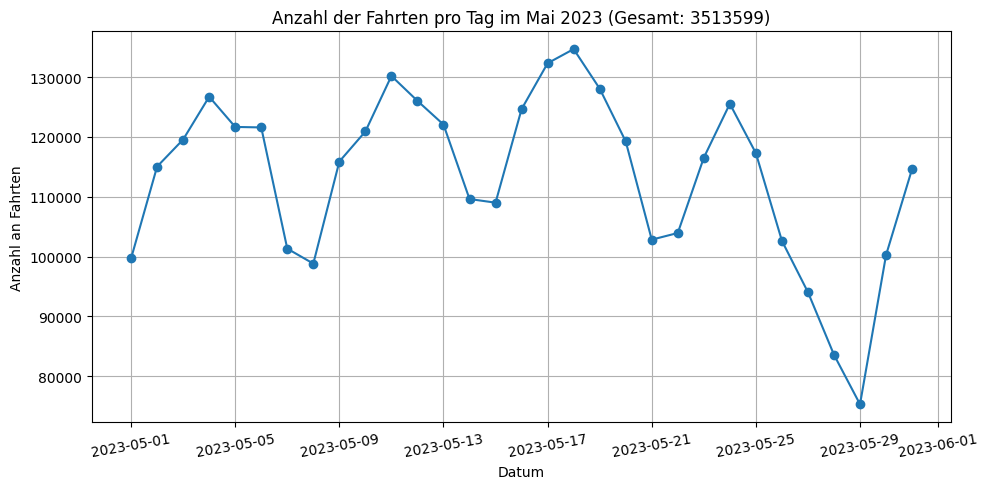

In [25]:
# Laden der Fahrten je Tage
def counts_day_trips_for_month(data, year, month):
    start_date = date(year, month, 1)
    end_date = date(year, month, calendar.monthrange(year, month)[1])
    data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.date #Extrahiere nur das Datum
    count_list = []

    # Aufteilung in Tagen
    for current_date in pd.date_range(start_date, end_date):
        count = (data['tpep_pickup_datetime'] == current_date.date()).sum()
        count_list.append((current_date.date(), count))
    return count_list

month = 5
year = 2023
path = 'C:\\Users\\Marc Willberg\\Studienarbeit_Predictive_Analytics\\Data_Taxi_Trip_NY\\2023\\yellow_tripdata_2023-05.parquet'
data = pd.read_parquet(path)
list_day_trips = counts_day_trips_for_month(data, year, month)
total_trips = sum(i[1] for i in list_day_trips) # Gesamtanzahl der Fahrten

# Anzeigen Diagram
x_data = [i[0] for i in list_day_trips]
y_data = [i[1] for i in list_day_trips]
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title(f'Anzahl der Fahrten pro Tag im Mai 2023 (Gesamt: {total_trips})')
plt.xlabel('Datum')
plt.ylabel('Anzahl an Fahrten')
plt.grid(True)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


<h2>Vorbereitung der Daten:</h2>
Zunächst werden die Daten vorbereitet um Algorithmen auf diesen anzuwenden.

In [26]:
class TaxiTripFeatures:
    def __init__(self, travel_time,start_month, start_day, start_hour, weekday, passenger_count, trip_distance, PULocationID, DOLocationID, tip_amount, total_amount_without_tip):
        self.travel_time = travel_time                           #Fahrtzeit in Sekunden
        self.start_day = start_day                               #Tag in dem das Taxi gestartet hat
        self.start_hour = start_hour                             #Stunde in dem das Taxi gestartet hat
        self.weekday = weekday                                   #Wochentag als int in dem das Taxi gestartet hat
        self.passenger_count = passenger_count                   #Anzahl der Passagiere
        self.trip_distance = trip_distance                       #Fahrtdistanz in Meilen 
        self.PULocationID = PULocationID                         #StartID Standort
        self.DOLocationID = DOLocationID                         #ZielID Standort
        self.tip_amount = tip_amount                             #Trinkgeld
        self.total_amount_without_tip = total_amount_without_tip #Gesamtbetrag ohne Trinkgeld

    def __repr__(self):
        return (f"TaxiTripFeatures(travel_time={self.travel_time}, start_day={self.start_day}, "
                f"start_hour={self.start_hour}, weekday={self.weekday}, passenger_count={self.passenger_count}, "
                f"trip_distance={self.trip_distance}, PULocationID={self.PULocationID}, DOLocationID={self.DOLocationID}, "
                f"tip_amount={self.tip_amount}, total_amount_without_tip={self.total_amount_without_tip})")

<h2>Analyse der Datengröße:</h2>

<h3>Laden der gesamten Daten:</h3>
Um eine gute Stichprobe der Datensätze zu ermitteln werden zunächst alle Datensätze benötigt. Hierzu ist zu beachten das nur Datensätze geladen werden die nicht leer sind und wo mit Kreditkarte gezahlt wurde. Dies hat den Grund da bei Bahrzahlung das Trinkgeld nicht angegeben wurde.

In [206]:
def load_features_from_file(file_path):
    data = pd.read_parquet(file_path, engine='auto')  
    data = data[data['payment_type'] == 1].dropna() #Nur Kreditkartenzahlung
    data = data.dropna() #Löschen von leeren Zeilen
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime']) #Konvertiert in Datumsformat
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime']) #Konvertiert in Datumsformat 
    return [
        TaxiTripFeatures(
            (row['tpep_dropoff_datetime'] - row['tpep_pickup_datetime']).total_seconds(),
            row['tpep_pickup_datetime'].month,
            row['tpep_pickup_datetime'].day,
            row['tpep_pickup_datetime'].hour,
            row['tpep_pickup_datetime'].weekday(),
            row['passenger_count'],
            row['trip_distance'],
            row['PULocationID'],
            row['DOLocationID'],
            row['tip_amount'],
            row['total_amount'] - row['tip_amount']
        ) for _, row in data.iterrows()
    ]

random_file = random.choice(parquet_files) # Auswahl zufällige Datei
print(f"Zufällig ausgewählte Datei: {random_file}")

start_time = time.time()
features_list = load_features_from_file(random_file)
end_time = time.time()

print(f"Anzahl Datensätze: {len(features_list)}")
print(f"Benötigte Zeit: {end_time - start_time} seconds.")


Zufällig ausgewählte Datei: C:\Users\Marc Willberg\Studienarbeit_Predictive_Analytics\Data_Taxi_Trip_NY\2023\yellow_tripdata_2023-11.parquet
Anzahl Datensätze: 2630182
Benötigte Zeit: 249.9808521270752 seconds.


<h3>Festlegung der Strichprobe:</h3>
Für die nächsten Schritte wird aus dem Jahr 2023 ein Monatsdatensatz als Stichprobe verwendet. Dies ermöglicht es, effizient Muster und Trends zu analysieren, ohne das gesamte Jahr betrachten zu müssen. Ein einzelner Monat bietet ausreichend Daten, um eine gute Aussage im Vergleich zu anderen Monaten zu treffen. Als Stichprobe betrachten wir 7% der Daten. Dies sollte pro Monat eine Stichprobengröße von ca. 200.000 Datensätzen ergeben.


In [207]:
sample_percentage = 0.07
sampled_data_list = []
data = pd.DataFrame([vars(feature) for feature in features_list])
grouped = data.groupby('start_day')
for _, group in grouped:
    sample_size = int(len(group) * sample_percentage)  # Anzahl an Daten pro Tag
    sampled_group = group.sample(n=sample_size)  # Zieht zufällige Werte
    sampled_data_list.append(sampled_group)
sampled_data = pd.concat(sampled_data_list, ignore_index=True) # Ingore_Index= datum Index gelöscht wird / Fügt Stichprobe zusammen

print(f"Anzahl der Stichprobendatensätze: {len(sampled_data)}")
df_head = sampled_data.head(5).T  # Anzeigen der ersten 5 Zeilen
display(df_head)

Anzahl der Stichprobendatensätze: 184095


,0,1,2,3,4
travel_time,202.00,1885.00,773.00,626.00,841.00
start_day,1.00,1.00,1.00,1.00,1.00
start_hour,11.00,15.00,17.00,22.00,9.00
weekday,2.00,2.00,2.00,2.00,2.00
passenger_count,1.00,2.00,1.00,2.00,1.00
trip_distance,0.57,0.12,0.96,2.00,2.60
PULocationID,142.00,230.00,48.00,87.00,236.00
DOLocationID,163.00,186.00,100.00,79.00,238.00
tip_amount,1.82,5.00,3.00,3.40,4.00
total_amount_without_tip,9.10,29.40,18.60,17.10,18.20


<h3>Vergleich statistische Daten:</h3>
Die Gesamtdaten werden mit den Stattischen Daten vergleichen.

In [208]:
print("Gesamtdaten:")
features_df = pd.DataFrame([vars(feature) for feature in features_list])
pd.set_option('display.float_format', '{:.2f}'.format)
features_df.describe()

Gesamtdaten:


,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
count,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00,2630182.00
mean,1089.48,14.80,14.49,2.95,1.35,3.38,166.90,166.28,4.48,25.71
std,2305.01,8.67,5.73,1.89,0.86,8.22,63.24,69.15,4.13,19.88
min,-3513.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,-7.42,-144.45
25%,486.00,8.00,11.00,1.00,1.00,1.06,132.00,116.00,2.24,14.30
50%,804.00,14.00,15.00,3.00,1.00,1.76,162.00,162.00,3.36,18.90
75%,1310.00,22.00,19.00,5.00,1.00,3.28,234.00,236.00,5.00,27.30
max,86381.00,31.00,23.00,6.00,9.00,7881.90,265.00,265.00,350.00,601.00


In [210]:
print("Stichprobe:")
pd.set_option('display.float_format', '{:.2f}'.format)
sampled_data.describe()

Stichprobe:


,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
count,184095.00,184095.00,184095.00,184095.00,184095.00,184095.00,184095.00,184095.00,184095.00,184095.00
mean,1097.95,14.80,14.47,2.95,1.34,3.36,166.83,166.45,4.47,25.67
std,2454.12,8.67,5.73,1.89,0.85,4.40,63.26,69.11,4.14,19.80
min,-3351.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,-7.42,-37.10
25%,487.00,8.00,11.00,1.00,1.00,1.06,132.00,125.00,2.24,14.30
50%,803.00,14.00,15.00,3.00,1.00,1.77,162.00,163.00,3.36,18.90
75%,1309.00,22.00,19.00,5.00,1.00,3.27,234.00,236.00,5.00,27.30
max,86340.00,31.00,23.00,6.00,8.00,126.16,265.00,265.00,230.50,451.00


<h3>Vergleich grafischer Daten:</h3> 
Gucken wir uns die Kontinurierlichen Daten <b>"travel_time"</b>, <b>"trip_distance"</b>, <b>"tip_amount"</b> und <b>"total_amount_without_tip"</b>.


Stichprobe wird auf Varianz und Divesität geprüft. Dies ist notwendig um Sicherzustellen ob die Stichprobe die gesamten Datenmengen gut abbildet.

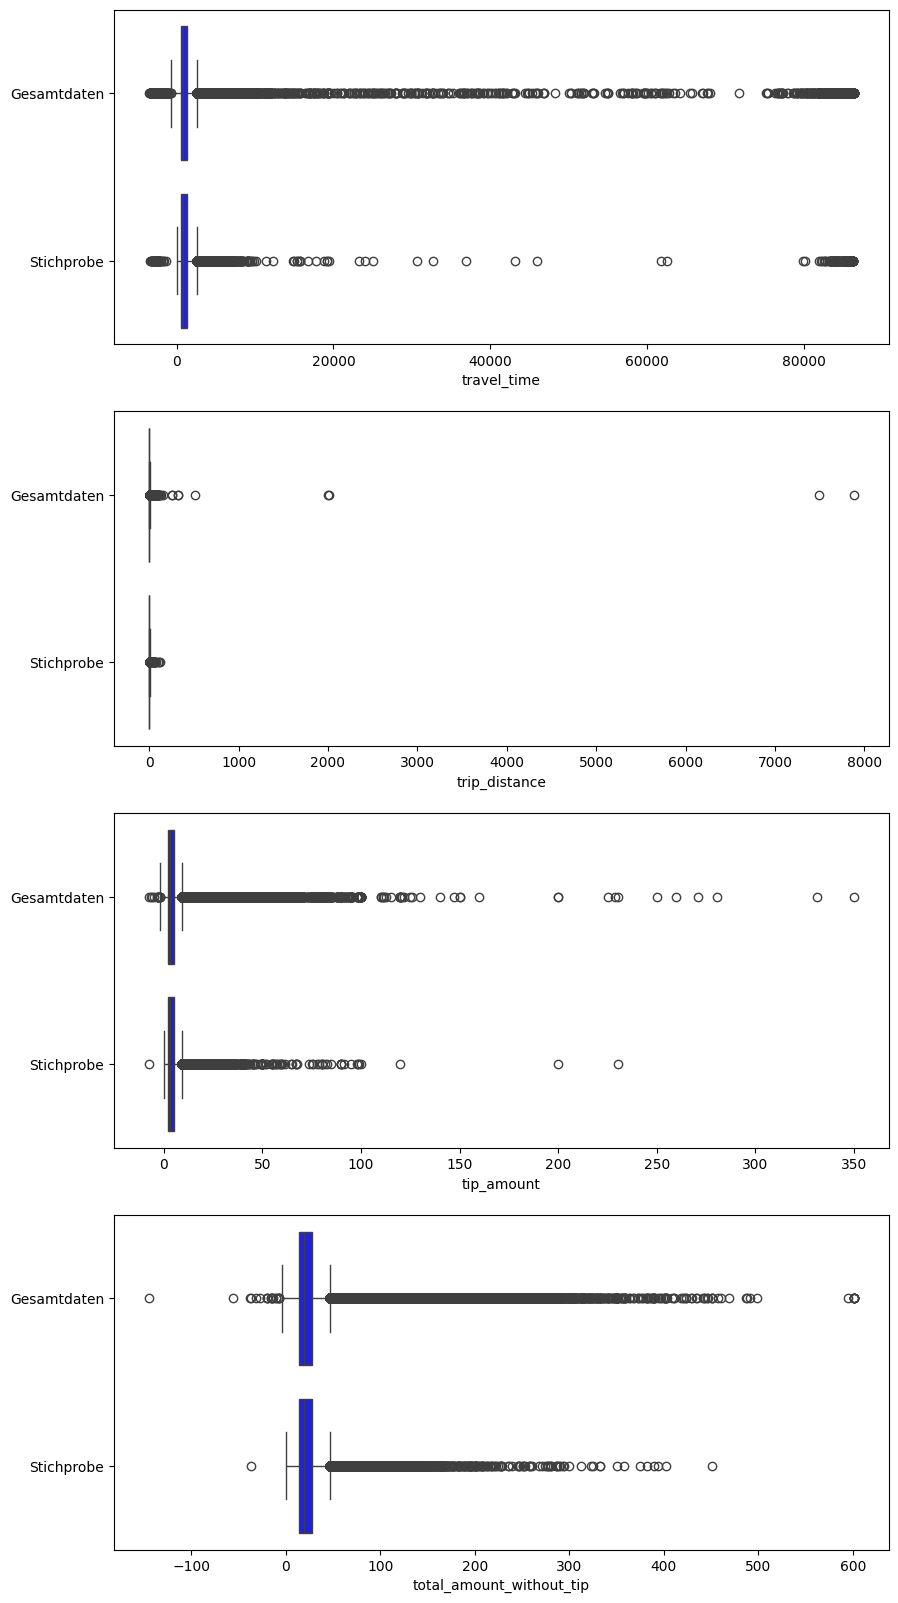

In [211]:
features = ['travel_time', 'trip_distance', 'tip_amount', 'total_amount_without_tip']

# Anzahl der benötigten Reihen
rows = len(features)
_, axes = plt.subplots(rows, 1, figsize=(10, 5 * rows))

#Erstellen von Boxplots
for i, feature in enumerate(features):
    combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
    combined_data.columns = ['Gesamtdaten', 'Stichprobe']
    sns.boxplot(data=combined_data, orient='h', color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
plt.show()

Angucken der ordinalen Daten <b>"weekday"</b> und diskreten Daten <b>"passenger_count"</b> und <b>"start_hour"</b>.

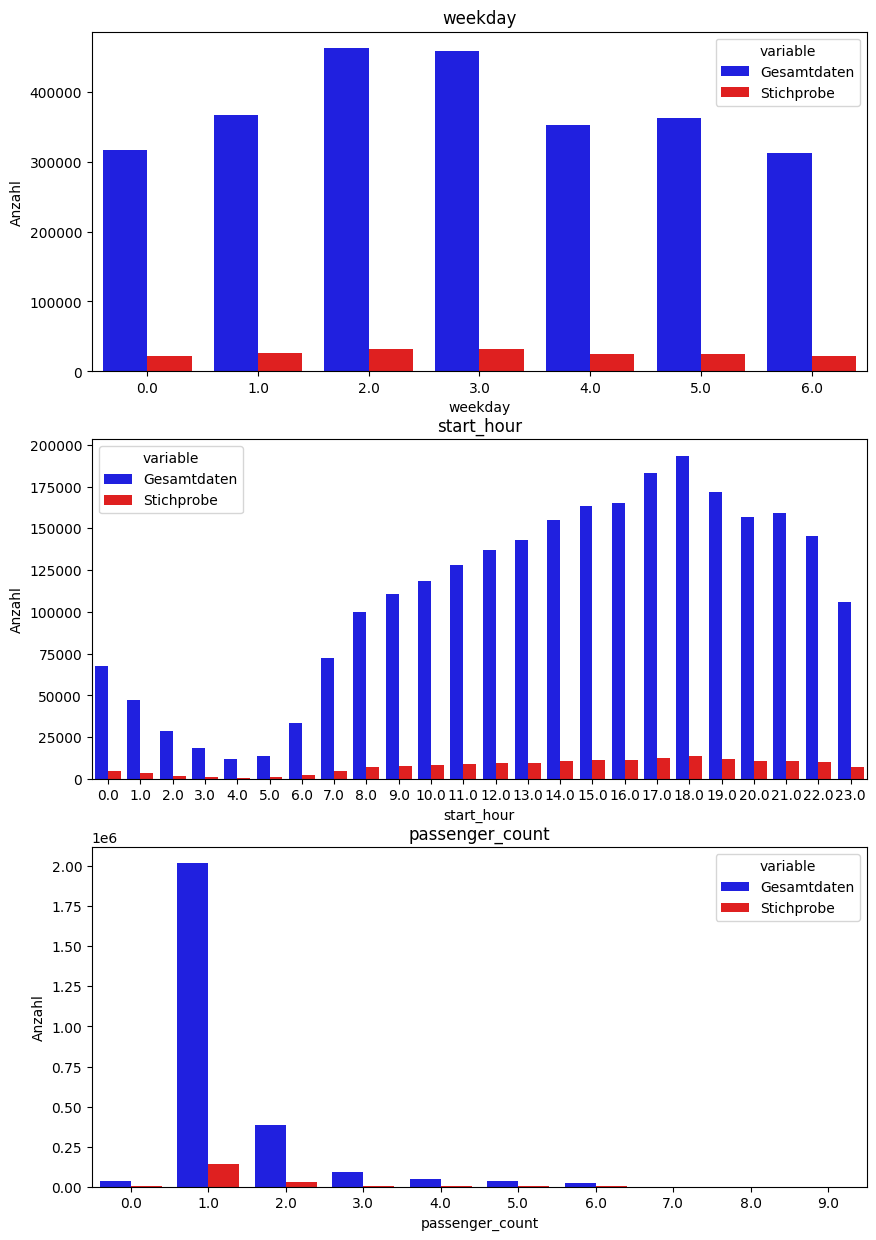

In [212]:
categorical_features = ['weekday', 'start_hour', 'passenger_count']

# Anzahl der benötigten Reihen
rows = len(categorical_features)
_, axes = plt.subplots(rows, 1, figsize=(10, 5 * rows))

# Anzeigen Countplots
for i, feature in enumerate(categorical_features):
    combined_data = pd.concat([data[feature], sampled_data[feature]], axis=1)
    combined_data.columns = ['Gesamtdaten', 'Stichprobe']
    sns.countplot(data=pd.melt(combined_data), x='value', hue='variable', ax=axes[i], palette=['blue', 'red'])
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Anzahl')
plt.show()

<h3>Bereinigung der Daten:</h3> 

Es ist zu erkennen das folgende Daten bereinigt werden müsse:
- negativen Werte (travel_time, tip_amount, total_amount_without_tip)
- Ausreißer

In [213]:
max_data = sampled_data.nlargest(5, 'travel_time')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
22155,86340.00,4,20,5,1.00,4.33,87,68,5.52,27.60
46740,86340.00,8,16,2,4.00,0.72,234,90,2.74,13.70
120427,86323.00,18,16,5,1.00,2.74,211,170,3.78,25.20
125257,86316.00,19,11,6,1.00,0.49,230,43,0.00,9.10
44276,86302.00,7,22,1,1.00,1.60,229,140,3.00,15.00


Die Ausreißer für die Fahrtzeiten sind extrem groß. Daher nehmen wir den maximal Wert von 5 Stunden (18000 Sekunden) an und löschen alle größeren Einträge.

In [214]:
max_data = sampled_data.nlargest(5, 'trip_distance')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
4008,914.00,1,8,2,1.00,126.16,140,137,3.00,21.70
152306,6310.00,25,3,5,4.00,108.10,132,265,20.00,277.94
26218,8412.00,4,22,5,0.00,99.90,237,265,50.00,381.95
85376,4337.00,13,12,0,2.00,73.80,100,265,73.60,294.45
31619,2545.00,5,19,6,1.00,66.68,138,265,0.00,207.39


Die Ausreißer für die Fahrtdistanzen sind extrem groß. Daher nehmen wir den maximal Wert von 200 Meilen an und löschen alle größeren Einträge.

In [215]:
max_data = sampled_data.nlargest(5, 'tip_amount')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
4168,490.00,1,17,2,1.00,0.00,142,142,230.50,9.50
62810,2268.00,10,20,4,2.00,2.80,158,87,200.01,36.70
38967,4341.00,6,19,0,1.00,48.90,132,265,120.00,221.04
38759,56.00,6,20,0,1.00,0.00,246,265,99.99,5.50
49037,2373.00,8,22,2,2.00,19.39,229,265,98.88,128.35


Die Ausreißer für Trinkgelder sind können groß sein. Daher nehmen wir den maximal Wert von 100 Dollar an und löschen alle größeren Einträge.

In [216]:
max_data = sampled_data.nlargest(5, 'total_amount_without_tip')
display(max_data)

,travel_time,start_day,start_hour,weekday,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount_without_tip
124251,13.00,19,23,6,1.00,0.00,265,265,45.00,451.00
11202,5500.00,2,23,3,1.00,64.42,114,265,50.00,402.60
78355,863.00,12,3,6,1.00,7.32,161,93,78.69,393.44
1404,3553.00,1,20,2,2.00,51.20,132,265,77.59,389.69
26218,8412.00,4,22,5,0.00,99.90,237,265,50.00,381.95


Die Ausreißer für zu bezahlenden Beträge können groß sein. Daher nehmen wir den maximal Wert von 500 Dollar an und löschen alle größeren Einträge.

In [217]:
cleaned_data = sampled_data.copy()
for index, row in sampled_data.iterrows():
    if (row < 0).any() or \
       row['travel_time'] > 18000 or \
       row['trip_distance'] > 200 or \
       row['tip_amount'] > 100 or \
       row['total_amount_without_tip'] > 500:
        cleaned_data.drop(index, inplace=True)

print(f"Anzahl Datensätze in der Stichprobe: {len(cleaned_data)}")

Anzahl Datensätze in der Stichprobe: 183891


<h1>Korrelation der Daten:</h1>

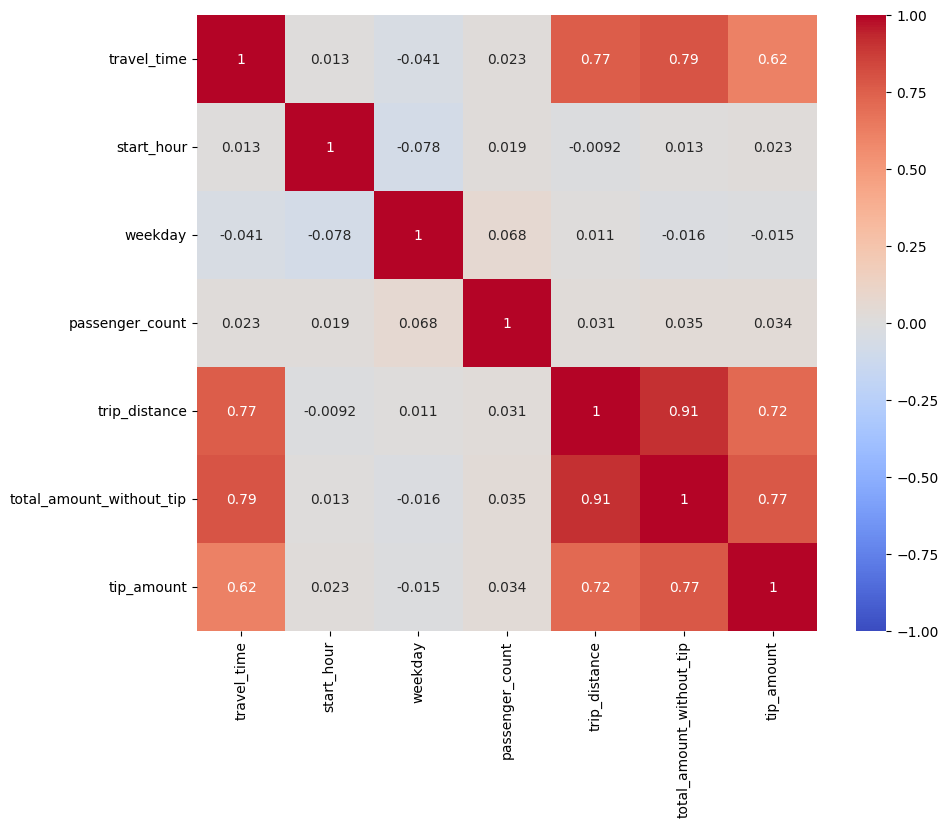

In [218]:
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip', 'tip_amount']
correlation_matrix = cleaned_data[features].corr()

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

<h1>Lieare Regression:</h1>

Im folgenden gucken wir uns die daten mit Linearer Regression an. Desweiten gucken wir uns die Zusammenhänge in einem Count Diagram an.

In [219]:
#Aufteilung
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
X = cleaned_data[features]
y = cleaned_data['tip_amount']

#Ausführung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # Vorhersagen auf dem Testset durchführen

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 7.02
R^2 Score: 0.57


<b>Ergebnis:</b> </br> 
    -R^2: Könnte besser sein da 1 der optimale Wert entspricht. Es können 57 % Der Varianz des Models erklärt werden.</br>
    -MSE: Durchschnittliche quadrierte Abweichung zwischen den tatsächlichen und vorhergesagten Trinkgeldbeträgen 7,02.

In [222]:
coefficients = model.coef_
intercept = model.intercept_

# Berechnung der p-Werte
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
p_values = est2.pvalues

# Ergebnisse anzeigen
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"F-Statistic: {est2.fvalue}, p-value: {est2.f_pvalue}")
print(f"Multiple R-squared: {est2.rsquared}, Adjusted R-squared: {est2.rsquared_adj}")
print("\nKoeffizienten und P-Werte:")
for feature, coef, p_val in results:
    print(f"{feature:30}\tCoef={coef:.6f}\tP-Value={p_val:.6e}")

Mean Squared Error (MSE): 7.02
R^2 Score: 0.57
F-Statistic: 37977.68133229075, p-value: 0.0
Multiple R-squared: 0.6076897533965229, Adjusted R-squared: 0.6076737521628488

Koeffizienten und P-Werte:
Intercept                     	Coef=0.464343	P-Value=2.824483e-69
travel_time                   	Coef=0.000053	P-Value=7.783820e-04
start_hour                    	Coef=0.009152	P-Value=2.912488e-15
weekday                       	Coef=-0.005225	P-Value=1.317329e-01
passenger_count               	Coef=0.007271	P-Value=3.367926e-01
trip_distance                 	Coef=0.105151	P-Value=2.798547e-143
total_amount_without_tip      	Coef=0.133772	P-Value=0.000000e+00


<b>Ergebnis:</b> </br>
    -der P-Wert der Vorhersage ist < 0,5 und liefert somit ein sehr guten Erklärungsbeitrag.</br>
    -60,7 % der Varianz kann somit erklärt werden.</br>
    -Da bei total_amount_without_tip der P-Wert sehr klein ist kann dieser für die Vorhersage des Trinkgeldes betrachtet werden.
     Durch das erhöhen des Wertes soll sich die Das Trinkgeld um 0,14 Einheiten erhöhen.

<b>Linearer Vergleich des Trinkgeldes:</b>

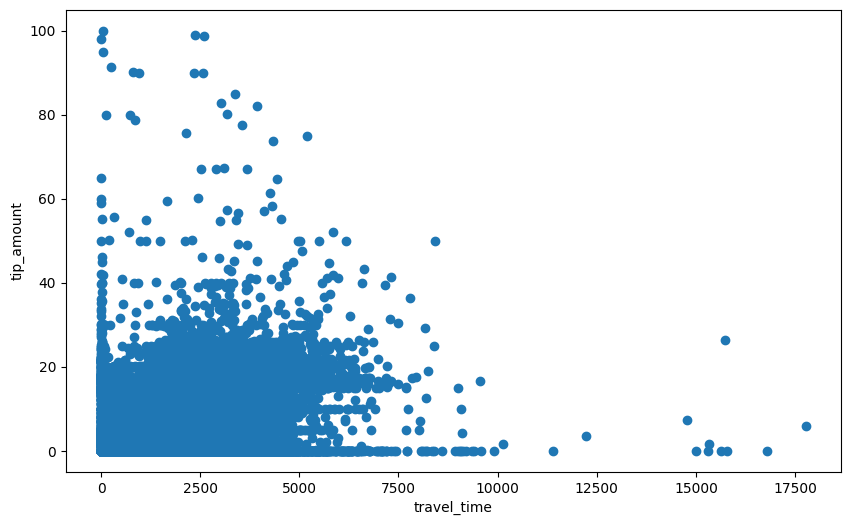

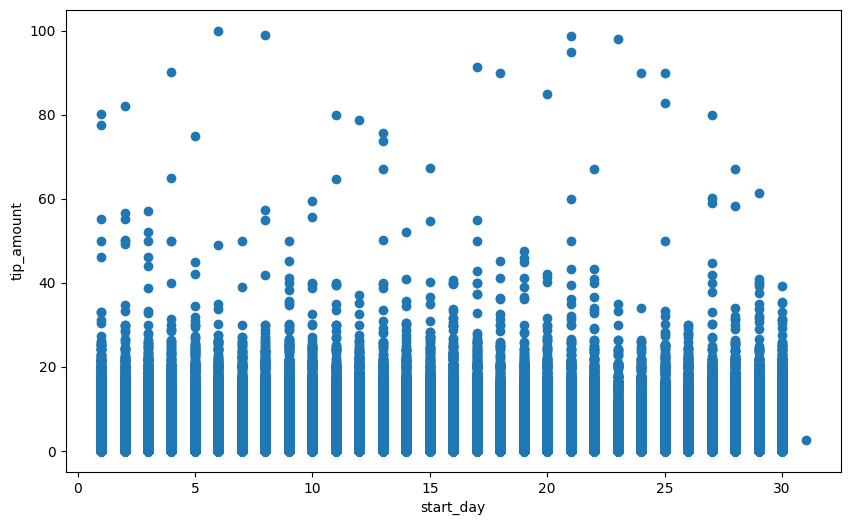

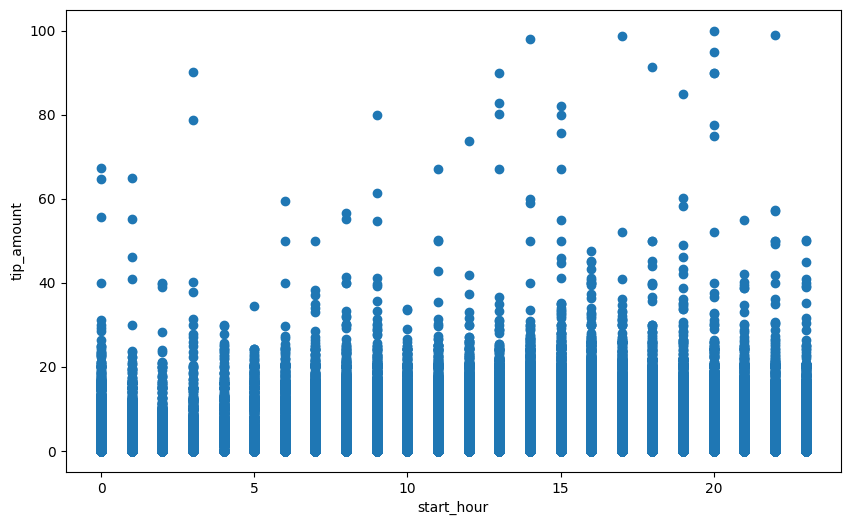

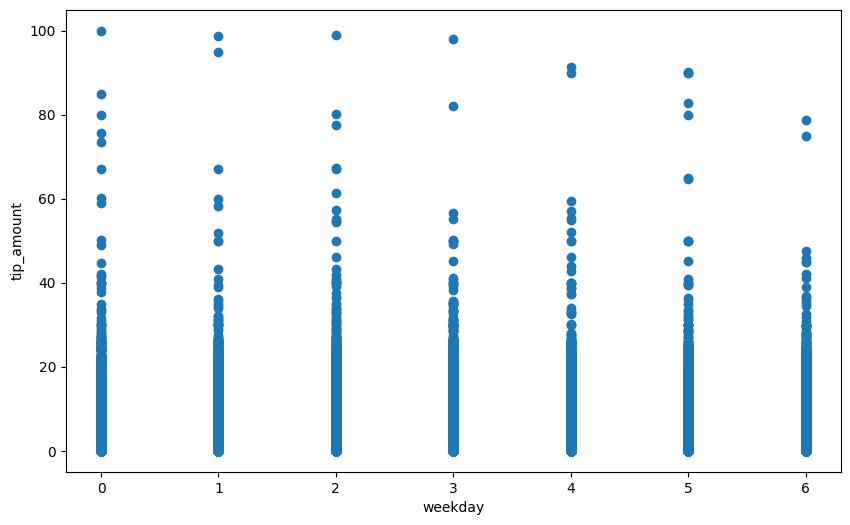

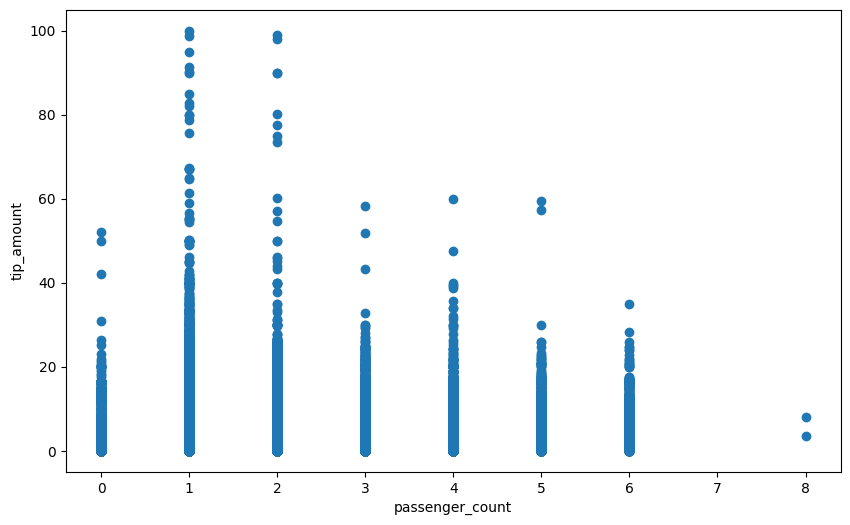

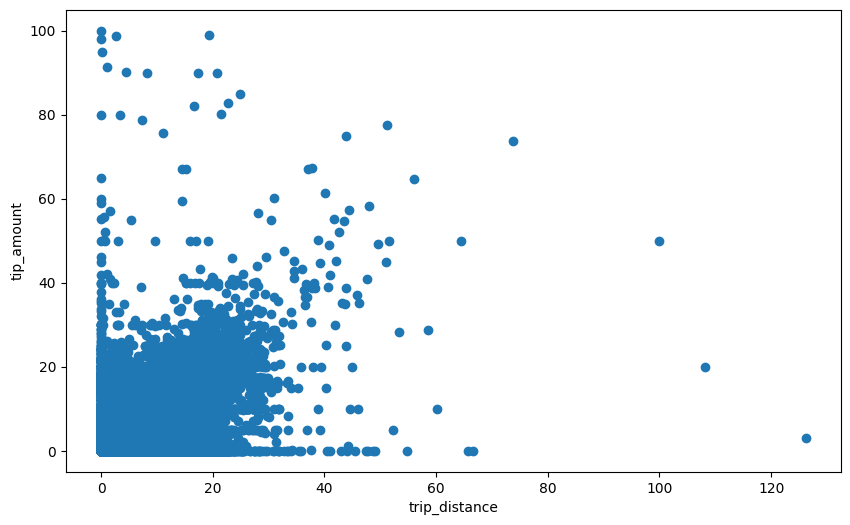

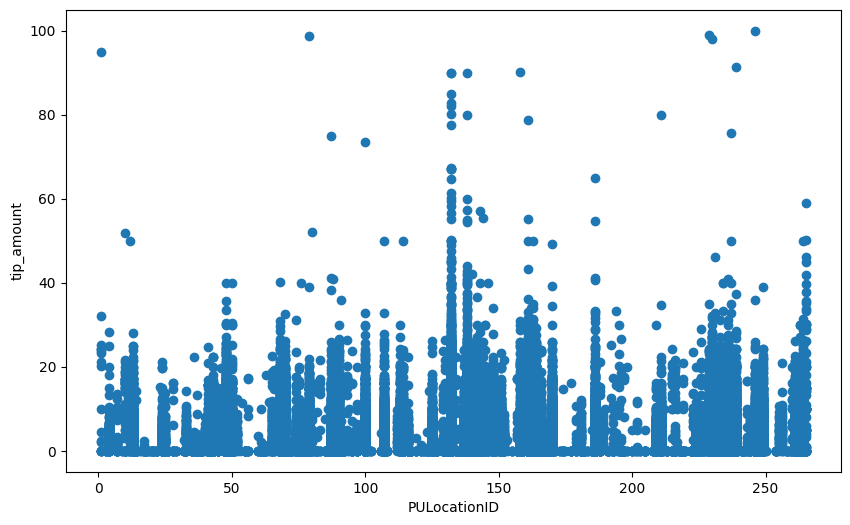

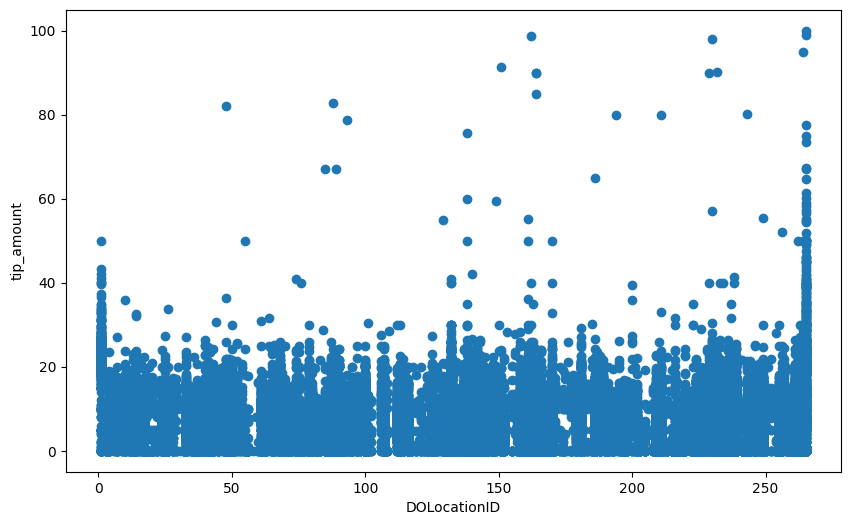

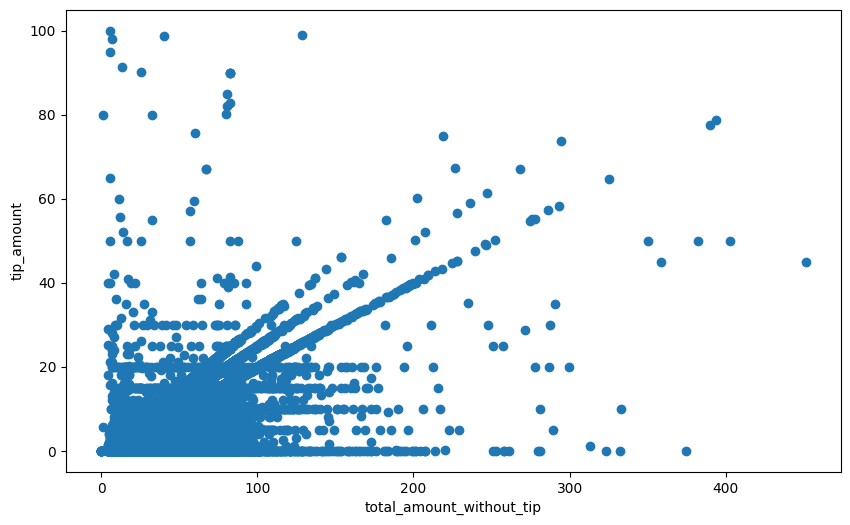

In [235]:
for label in cleaned_data.columns:
    if label != 'tip_amount':  #vergleicht alles Werte außer Trinkgeld
        plt.figure(figsize=(10, 6))
        plt.scatter(cleaned_data[label], cleaned_data['tip_amount'])
        plt.ylabel("tip_amount")
        plt.xlabel(label)
        plt.show()

<h1>Lineare Multiple Regression:</h1>

Mean Squared Error (MSE): 7.93
R^2 Score: 0.55
Koeffizienten: [-1.02100313e-05  9.07772461e-03 -1.89788657e-02  2.43197121e-02
  1.13900167e-01  1.33125113e-01]


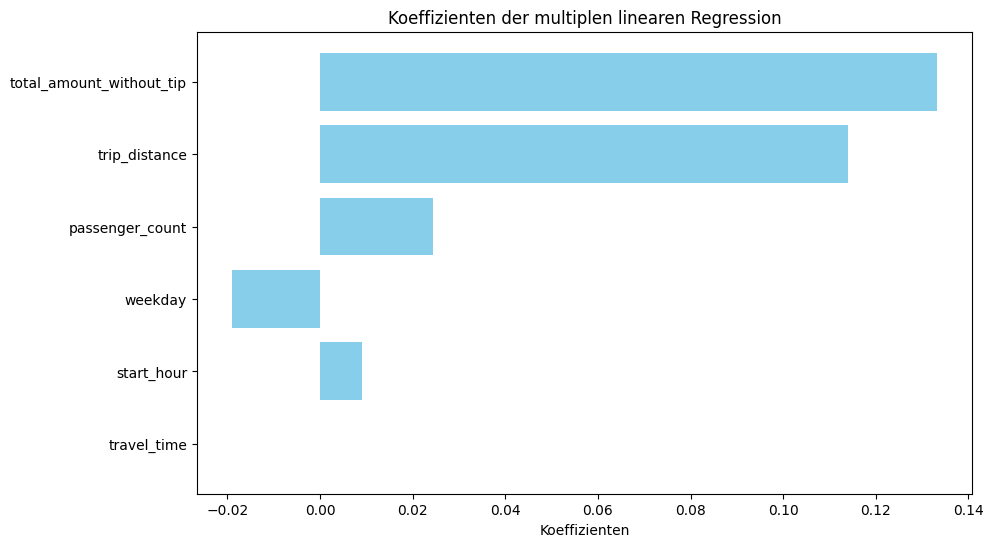

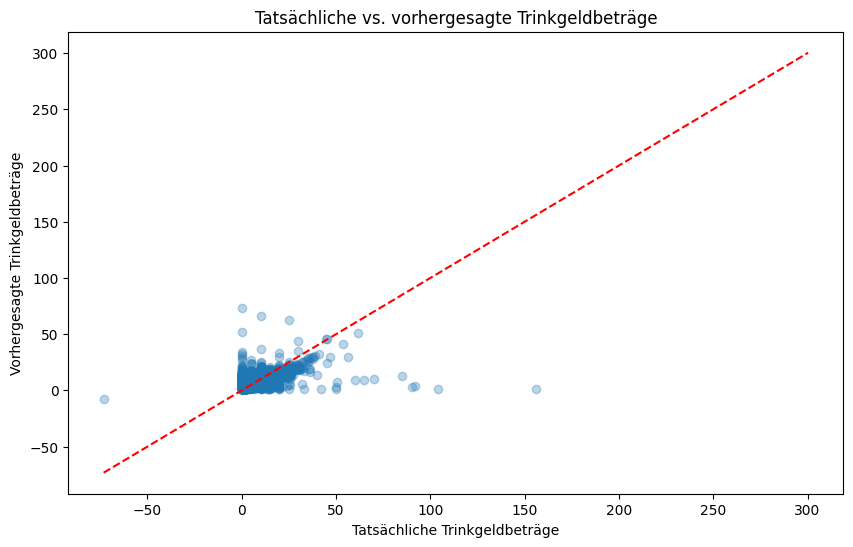

In [36]:
# Features und Zielvariable
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
target = 'tip_amount'

# Daten für die multiple lineare Regression vorbereiten
X = sampled_data[features]
y = sampled_data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiples lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset durchführen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Koeffizienten des Modells ausgeben
coefficients = model.coef_
print("Koeffizienten:", coefficients)

# Visualisierung der Koeffizienten
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel("Koeffizienten")
plt.title("Koeffizienten der multiplen linearen Regression")
plt.show()

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Tatsächliche Trinkgeldbeträge")
plt.ylabel("Vorhergesagte Trinkgeldbeträge")
plt.title("Tatsächliche vs. vorhergesagte Trinkgeldbeträge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


<h1>Random Forest:</h1> 

Mean Squared Error (MSE): 8.20
R^2 Score: 0.54
Feature Importances: [0.12867862 0.05879629 0.0425215  0.02553822 0.10696569 0.63749968]


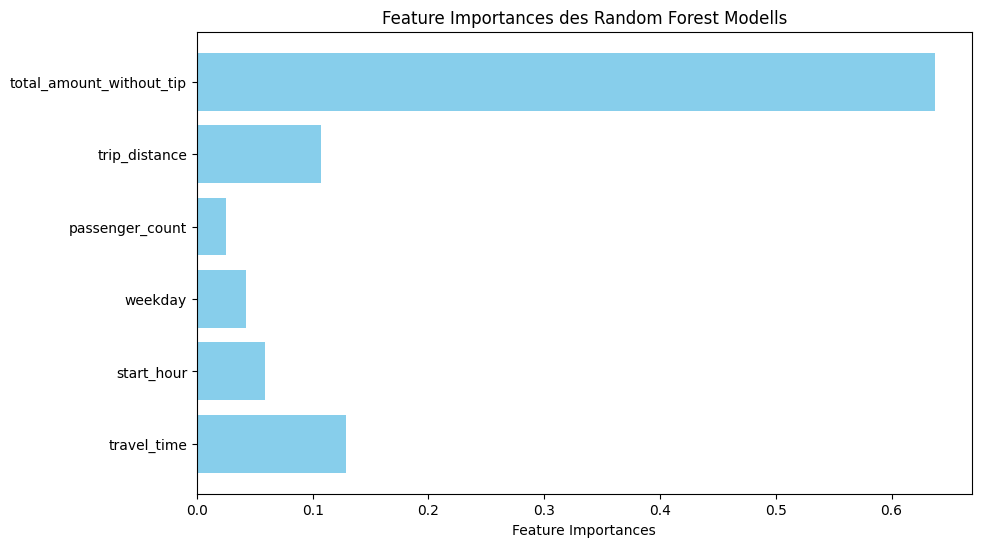

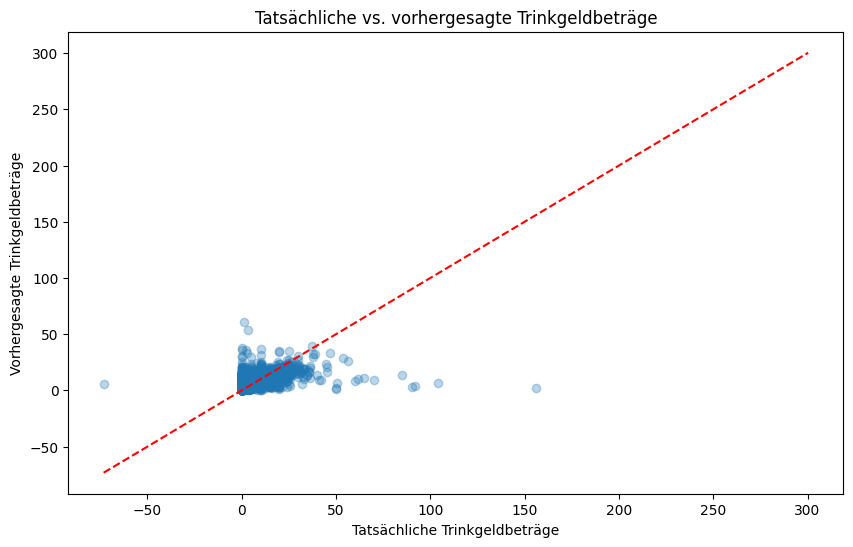

In [38]:
# Features und Zielvariable
features = ['travel_time', 'start_hour', 'weekday', 'passenger_count', 'trip_distance', 'total_amount_without_tip']
target = 'tip_amount'

# Daten für das Random Forest Modell vorbereiten
X = sampled_data[features]
y = sampled_data[target]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modell erstellen und trainieren
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset durchführen
y_pred = model.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature-Importances des Modells ausgeben
importances = model.feature_importances_
print("Feature Importances:", importances)

# Visualisierung der Feature-Importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importances")
plt.title("Feature Importances des Random Forest Modells")
plt.show()

# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Tatsächliche Trinkgeldbeträge")
plt.ylabel("Vorhergesagte Trinkgeldbeträge")
plt.title("Tatsächliche vs. vorhergesagte Trinkgeldbeträge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()
